In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('survey_results_public.csv')

In [3]:
df.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


In [4]:
df.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'Country', 'Currency',
       'CompTotal', 'CompFreq', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysProfessional use',
       'OpSysPersonal use', 'VersionControlSystem', 'VCInteraction',
       'VCHostingPersonal use', 'VCHostingProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWork

In [21]:
# filter NaN
print(df.shape)
df = df.dropna(thresh=df.shape[1]*0.4)
df.shape

(73268, 79)


(70028, 79)

In [22]:
def filter(df, column, filters):
    return df[df[column].isin(filters)]

countries = [
    'United States of America',
    'Switzerland',
    'United Kingdom of Great Britain and Northern Ireland',
    'France',
    'Germany',
    'Netherlands',
    'Spain',
    'Italy',
    'Austria',
    'Italy',
    'Canada',
    'Ireland',
    'Sweden',
    'Norway',
    'Australia',
    'Denmark'
]

country_filter = filter(df,'Country',countries)

In [23]:
country_filter.shape

(37425, 79)

In [24]:
selectedCategorical = [
    'Age',
    'EdLevel',
    'MainBranch',
    'OrgSize',
    'Country',
    'RemoteWork',
    'CompFreq',
    'YearsCode',
    'YearsCodePro'
]
multiCat = [
    'Employment',
    'MentalHealth',
    'CodingActivities',
    'DevType',
    'LanguageHaveWorkedWith',
    'Gender'
]
selectedNumerical = ['CompTotal']

In [32]:
df3 = df[selectedCategorical]
uniqueVal = { col:pd.unique(df3[col]) for col in selectedCategorical}

df1 = df[multiCat]
uniqueValMulticat = { col:pd.unique(df1[col]) for col in multiCat}

uniqueVal

{'Age': array(['25-34 years old', '35-44 years old', 'Under 18 years old',
        '18-24 years old', '45-54 years old', '55-64 years old', nan,
        '65 years or older', 'Prefer not to say'], dtype=object),
 'EdLevel': array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
        'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
        'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
        'Some college/university study without earning a degree',
        'Something else', 'Primary/elementary school',
        'Other doctoral degree (Ph.D., Ed.D., etc.)',
        'Associate degree (A.A., A.S., etc.)',
        'Professional degree (JD, MD, etc.)', nan], dtype=object),
 'MainBranch': array(['I am not primarily a developer, but I write code sometimes as part of my work',
        'I am a developer by profession', 'I code primarily as a hobby',
        'I used to be a developer by profession, but no longer am',
        'I am learning to code'], dt

In [29]:
# Split categorical data by separator into one-hot columns
data_df = df[selectedCategorical+selectedNumerical]

multivalColumns = {}

for col in multiCat:
    df_temp = df1[col].str.get_dummies(sep = ';').add_prefix(col+' - ')
    multivalColumns[col] = df_temp.columns
    data_df = data_df.join(df_temp)

In [31]:
df['EdLevel'].str.split(';').explode().unique().tolist()

['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
 'Some college/university study without earning a degree',
 'Something else',
 'Primary/elementary school',
 'Other doctoral degree (Ph.D., Ed.D., etc.)',
 'Associate degree (A.A., A.S., etc.)',
 'Professional degree (JD, MD, etc.)',
 nan]

In [16]:
multivalColumns

{'Employment': Index(['Employment - Employed, full-time', 'Employment - Employed, part-time',
        'Employment - I prefer not to say',
        'Employment - Independent contractor, freelancer, or self-employed',
        'Employment - Not employed, and not looking for work',
        'Employment - Not employed, but looking for work',
        'Employment - Retired', 'Employment - Student, full-time',
        'Employment - Student, part-time'],
       dtype='object'),
 'MentalHealth': Index(['MentalHealth - I have a concentration and/or memory disorder (e.g., ADHD, etc.)',
        'MentalHealth - I have a mood or emotional disorder (e.g., depression, bipolar disorder, etc.)',
        'MentalHealth - I have an anxiety disorder',
        'MentalHealth - I have autism / an autism spectrum disorder (e.g. Asperger's, etc.)',
        'MentalHealth - I have learning differences (e.g., Dyslexic, Dyslexia, etc.)',
        'MentalHealth - None of the above',
        'MentalHealth - Or, in your ow

In [10]:
data_df

,Age,EdLevel,MainBranch,OrgSize,Country,RemoteWork,CompFreq,YearsCode,YearsCodePro,CompTotal,...,LanguageHaveWorkedWith - Scala,LanguageHaveWorkedWith - Solidity,LanguageHaveWorkedWith - Swift,LanguageHaveWorkedWith - TypeScript,LanguageHaveWorkedWith - VBA,Gender - Man,"Gender - Non-binary, genderqueer, or gender non-conforming","Gender - Or, in your own words:",Gender - Prefer not to say,Gender - Woman
2,25-34 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","I am not primarily a developer, but I write co...",20 to 99 employees,United Kingdom of Great Britain and Northern I...,"Hybrid (some remote, some in-person)",Yearly,14,5,32000.0,...,0,0,0,0,0,1,0,0,0,0
3,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",I am a developer by profession,100 to 499 employees,Israel,Fully remote,Monthly,20,17,60000.0,...,0,0,0,1,0,1,0,0,0,0
4,25-34 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",I am a developer by profession,20 to 99 employees,United States of America,"Hybrid (some remote, some in-person)",NaN,8,3,NaN,...,0,0,1,1,0,0,0,0,0,0
5,25-34 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","I am not primarily a developer, but I write co...",NaN,Germany,NaN,NaN,15,NaN,NaN,...,0,0,0,0,0,0,0,1,0,0
6,Under 18 years old,"Secondary school (e.g. American high school, G...",I code primarily as a hobby,NaN,India,NaN,NaN,3,NaN,NaN,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73263,25-34 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",I am a developer by profession,100 to 499 employees,Nigeria,Fully remote,Yearly,8,5,60000.0,...,0,0,0,1,0,1,0,0,0,0
73264,25-34 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",I am a developer by profession,I don’t know,United States of America,Full in-person,Yearly,6,5,107000.0,...,0,0,0,0,0,1,0,0,0,0
73265,55-64 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","I am not primarily a developer, but I write co...",20 to 99 employees,United States of America,"Hybrid (some remote, some in-person)",NaN,42,33,NaN,...,0,0,0,0,0,1,0,0,0,0
73266,55-64 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",I am a developer by profession,10 to 19 employees,United Kingdom of Great Britain and Northern I...,"Hybrid (some remote, some in-person)",Yearly,50,31,58500.0,...,0,0,0,0,1,1,0,0,0,0


In [11]:
data_df = data_df.dropna(thresh=data_df.shape[1]*0.95)
data_df.shape

(69809, 110)

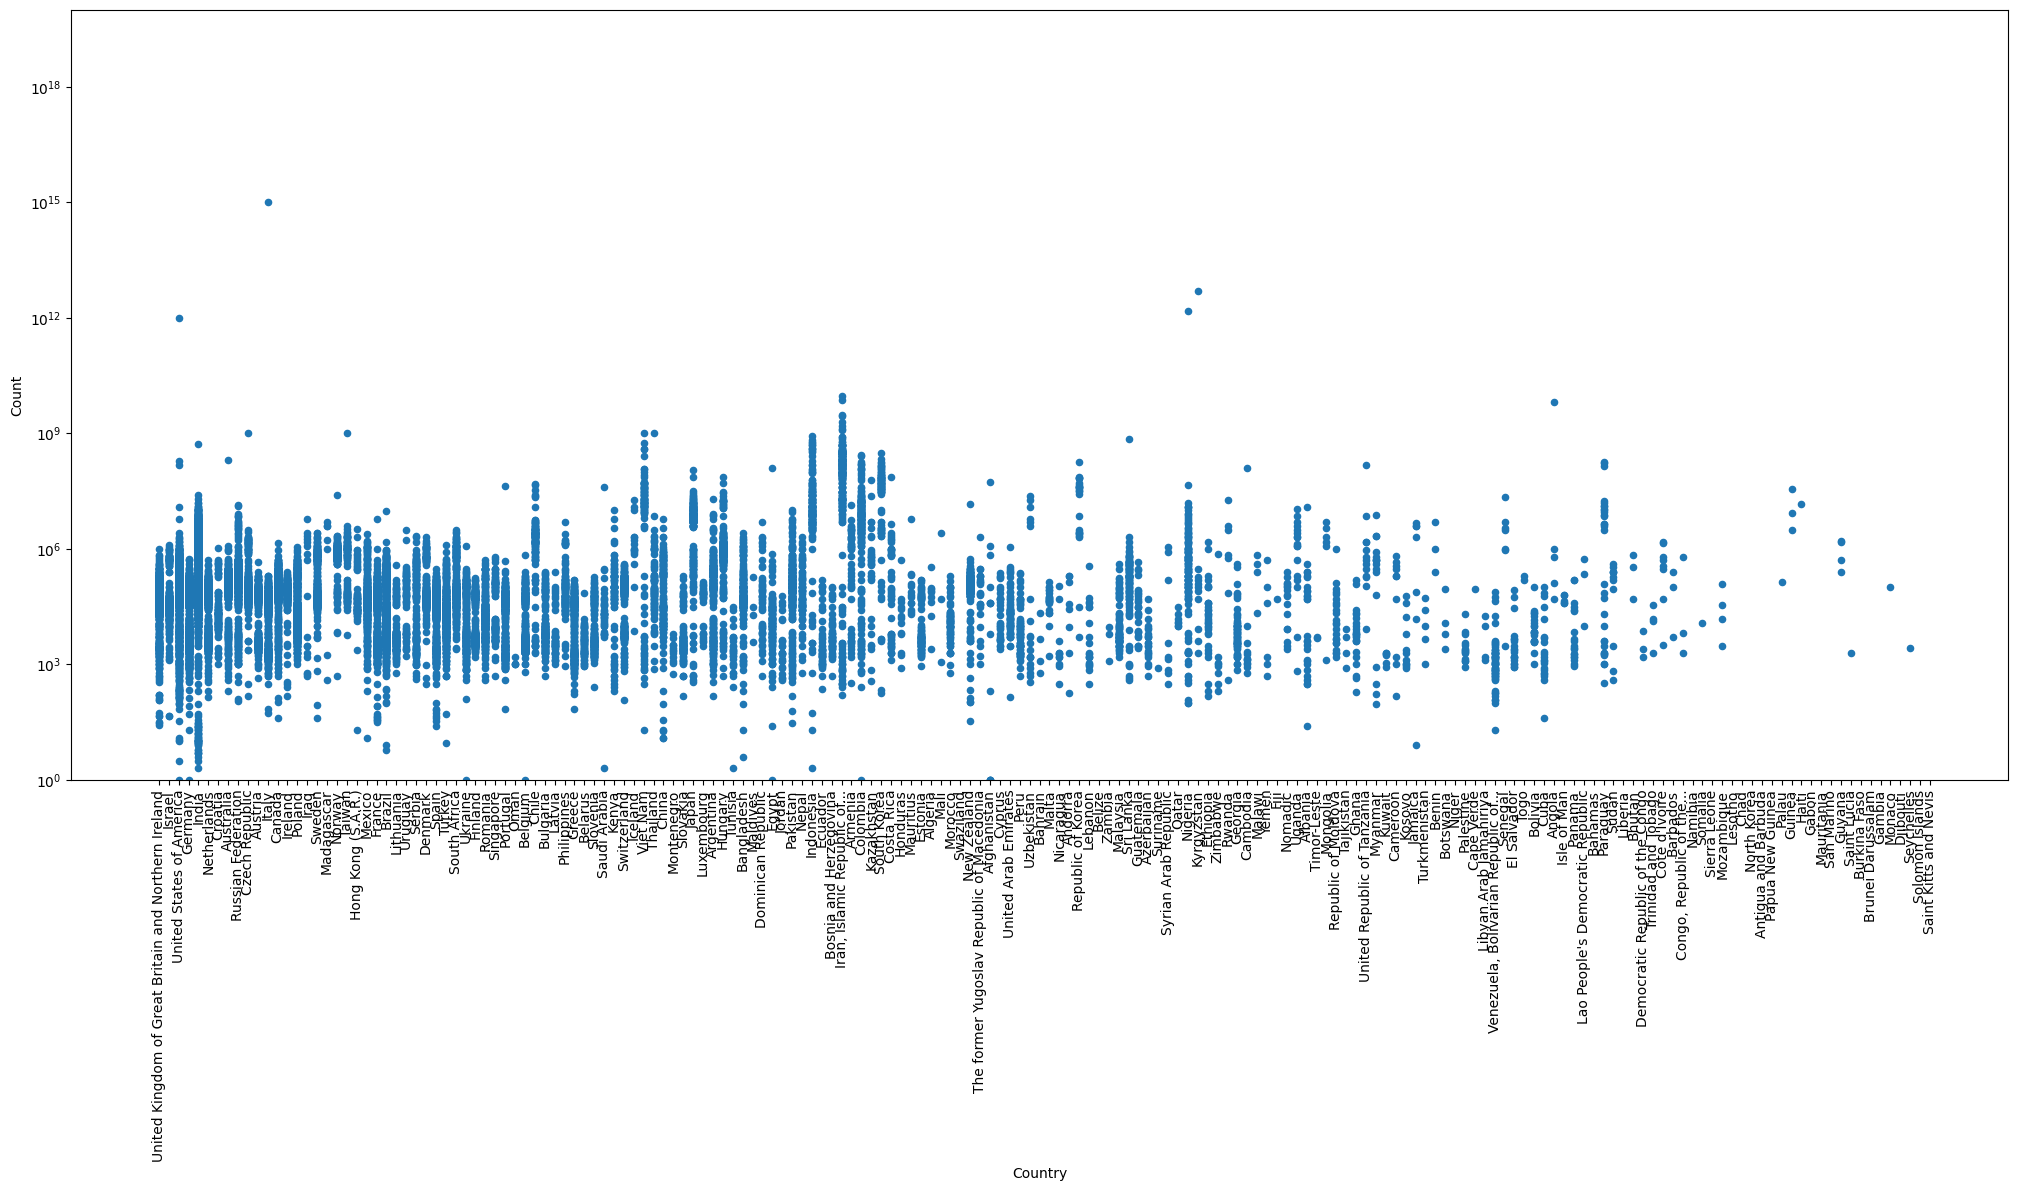

In [12]:
data_df.plot(x='Country', y='CompTotal', kind='scatter', ylim=(1, 1e20), logy=True, xlabel='Country', ylabel='Count', rot=90, figsize=(25,10))
# plt.yscale('log')
plt.show()

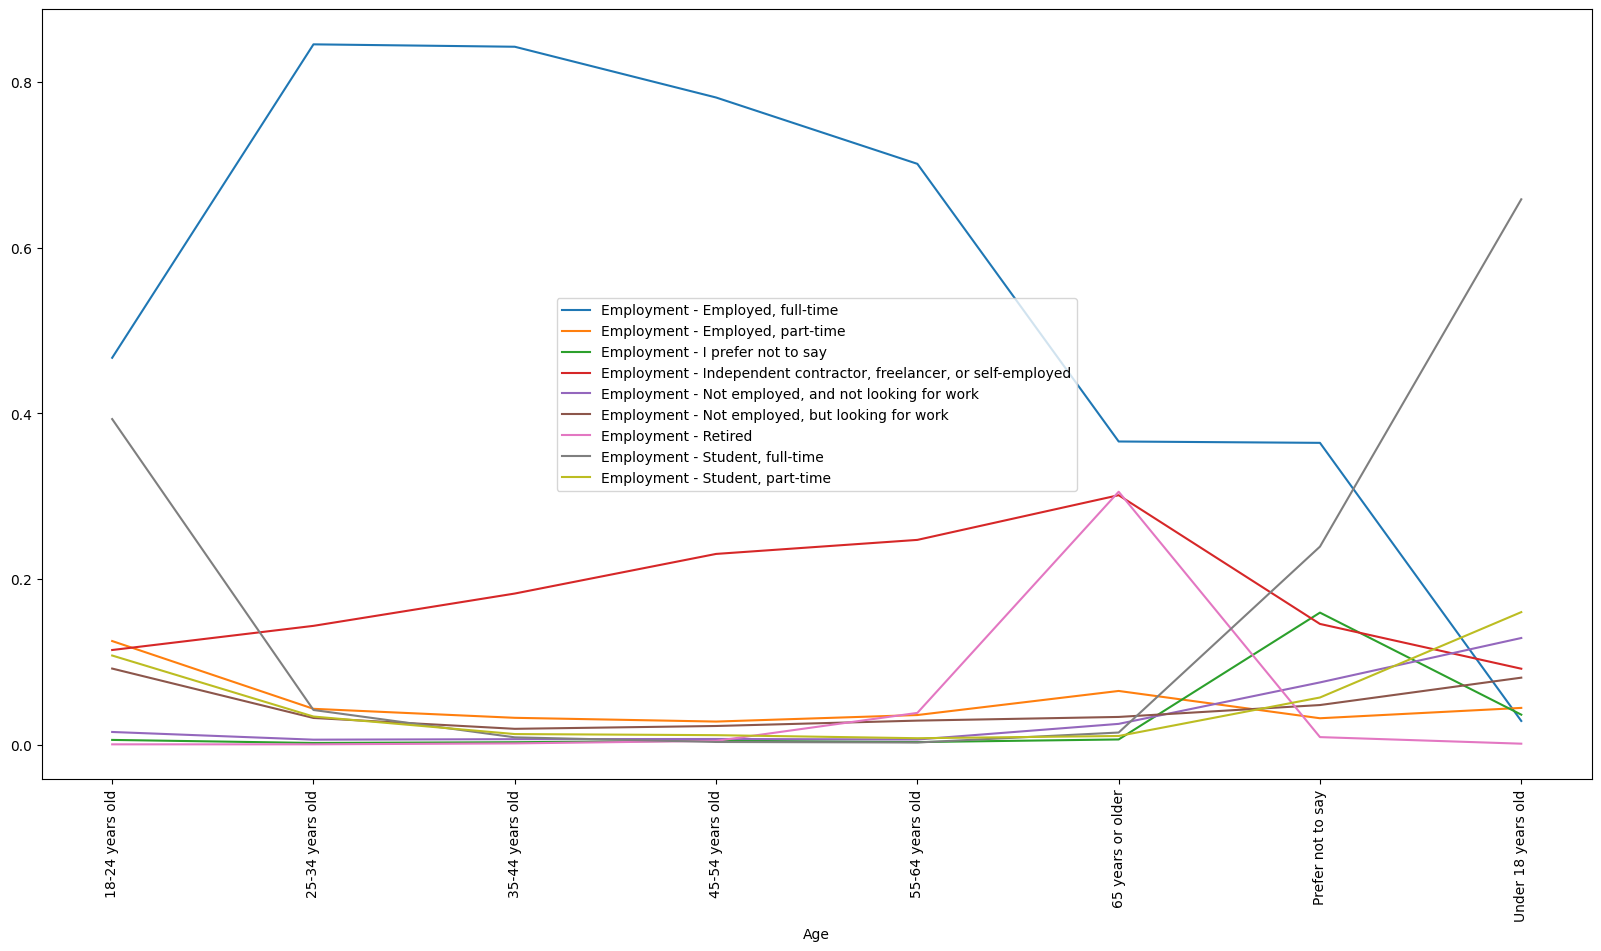

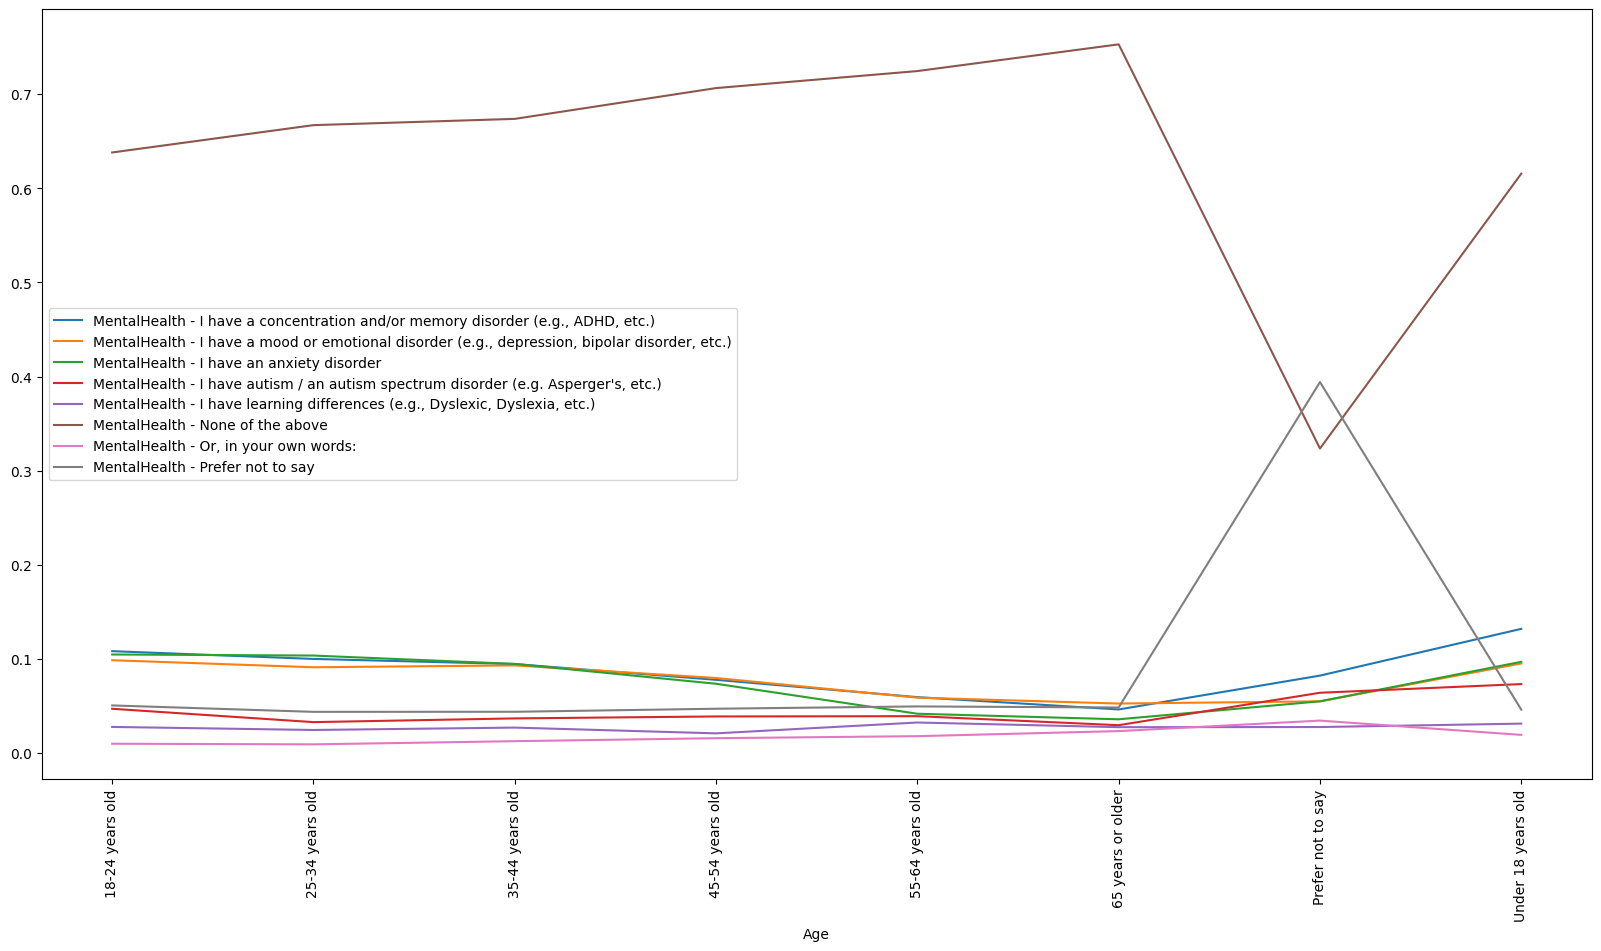

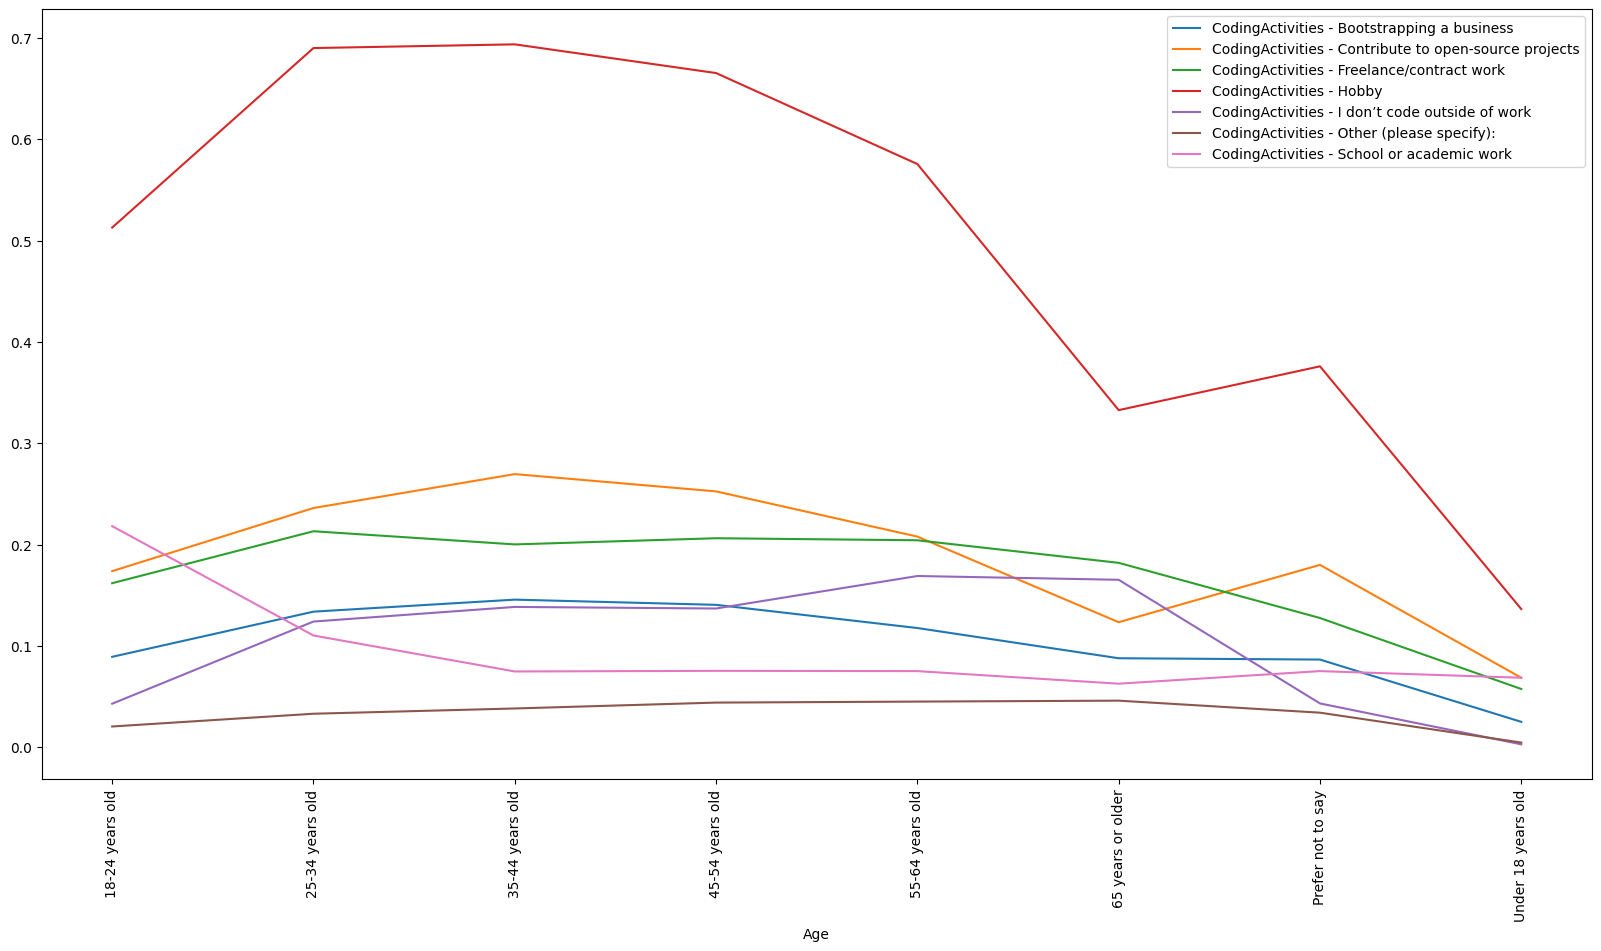

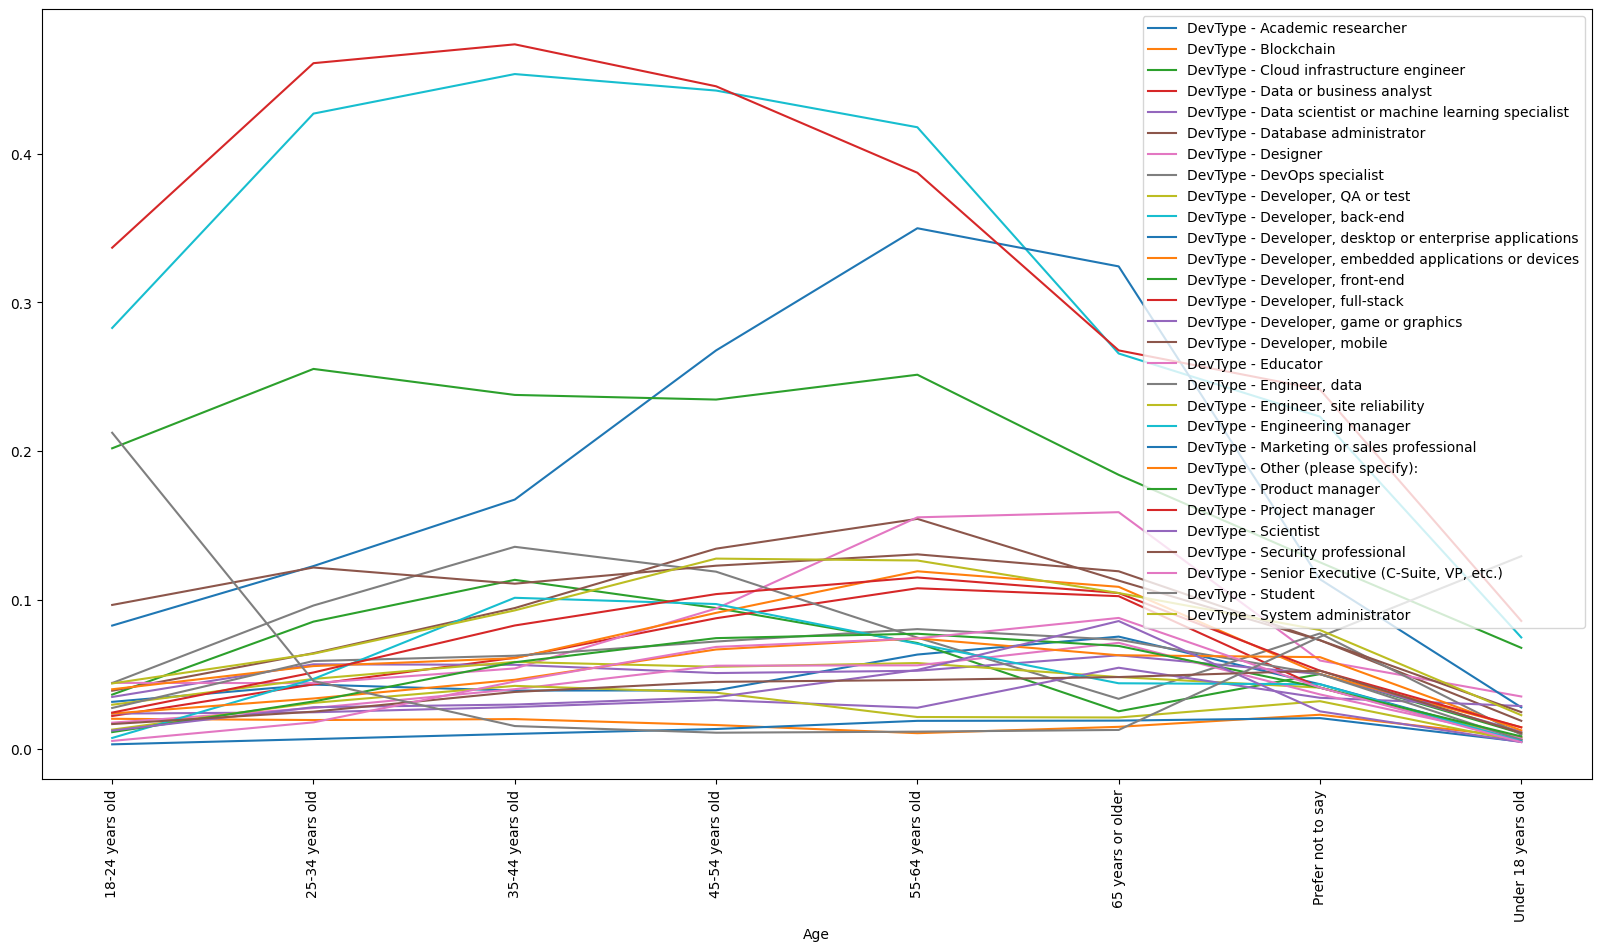

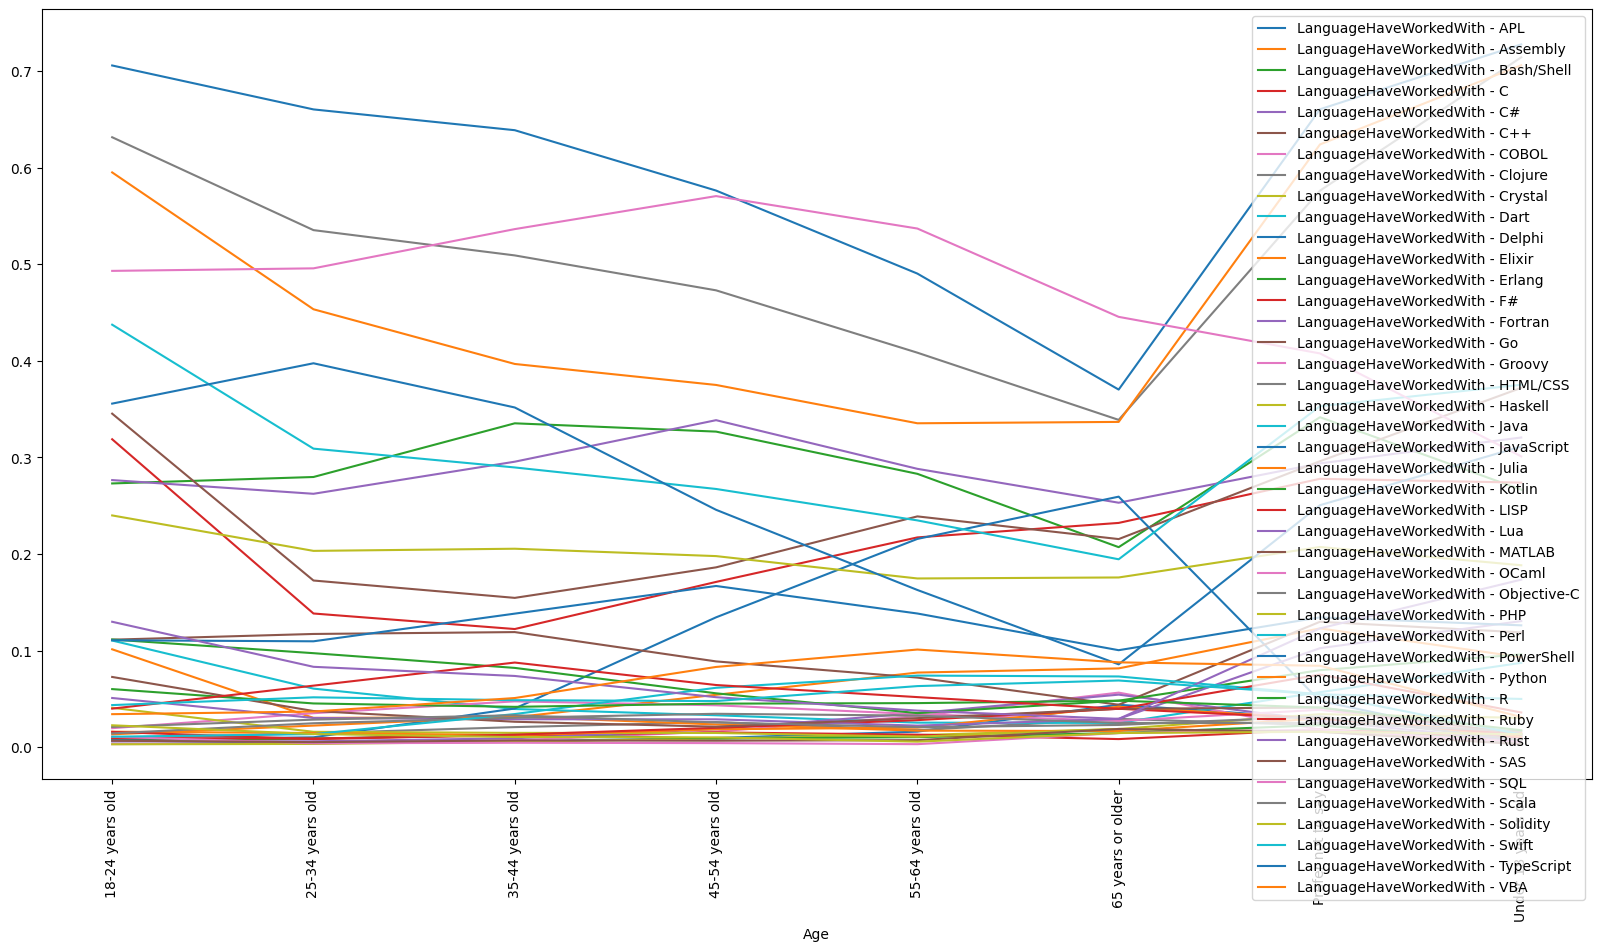

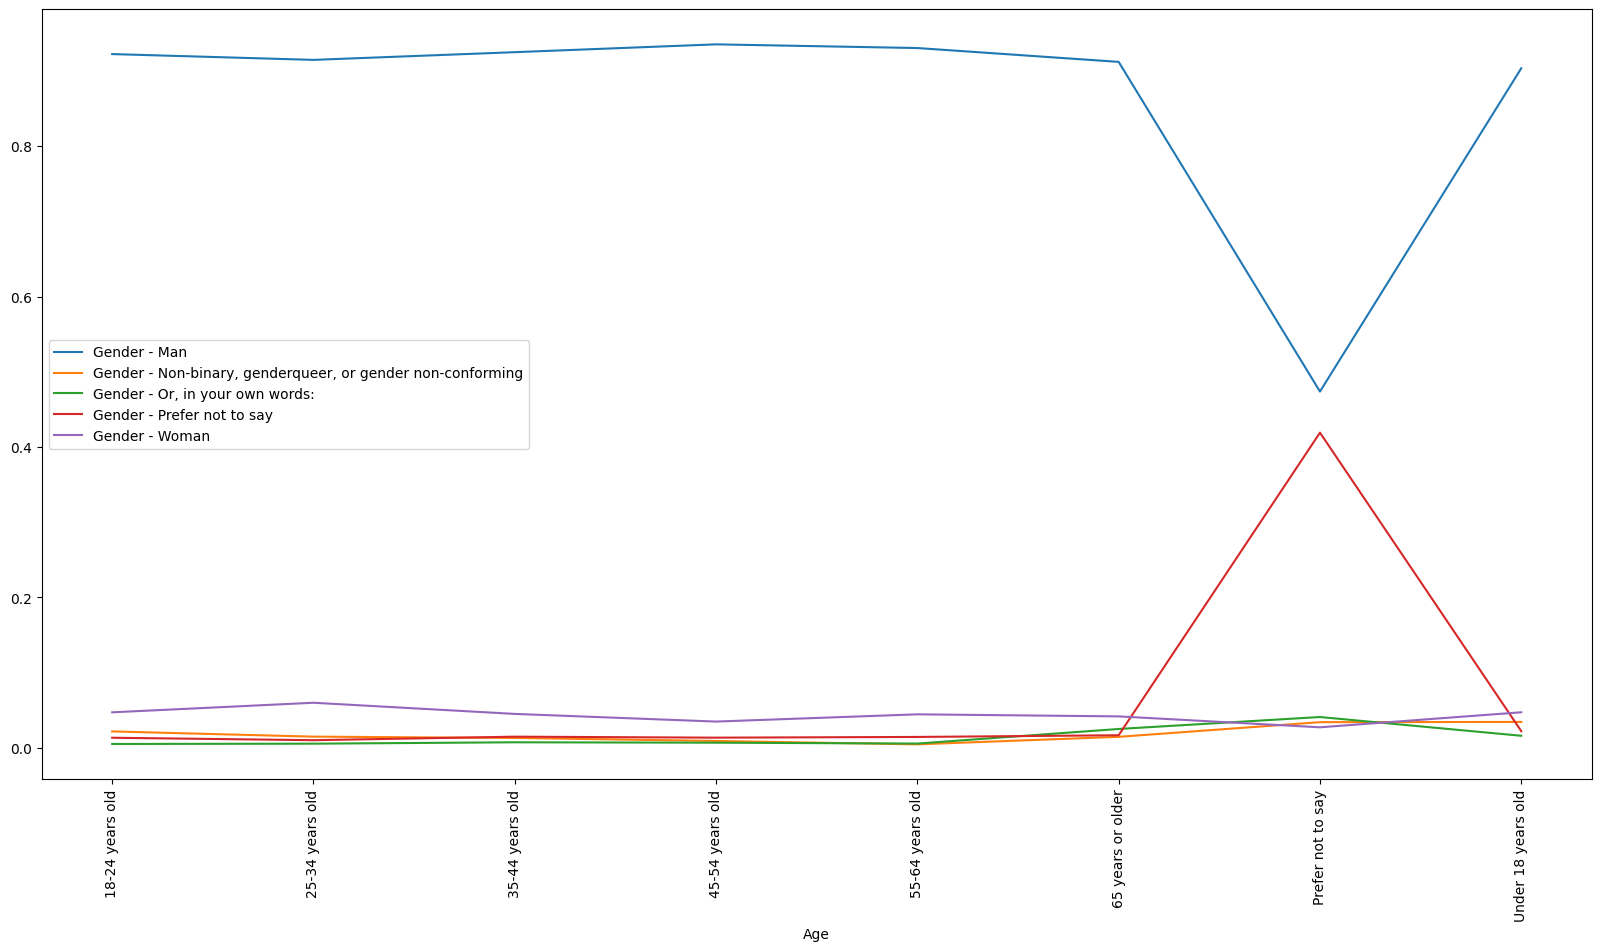

In [13]:
for cat in multiCat:
    data_df.groupby('Age')[multivalColumns[cat]].agg('mean').plot(y=multivalColumns[cat], figsize=(20,10))
    plt.xticks(rotation=90)
    plt.show()

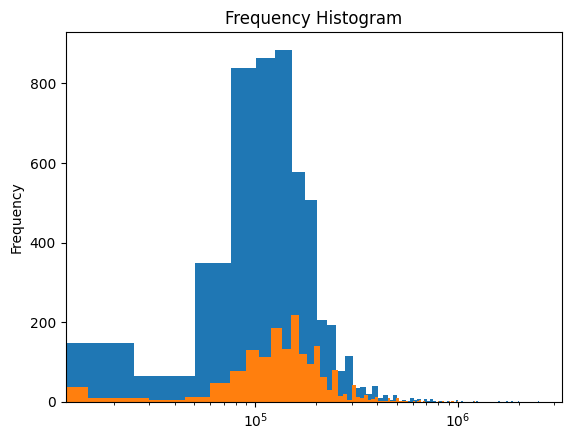

In [14]:
# Display the salary distribution between Bachelor and Master degree
# First, get the bachelor and master of the US
bs_ms_df = data_df[data_df['Country']=='United States of America']
bs_ms_df = bs_ms_df[bs_ms_df['CompTotal'] < 10e6]
bs_df = bs_ms_df.loc[bs_ms_df['EdLevel'].str.startswith(('Bachelor'), na=False)]
ms_df = bs_ms_df.loc[bs_ms_df['EdLevel'].str.startswith(('Master'), na=False)]
plt.hist(bs_df['CompTotal'], bins=100)
plt.hist(ms_df['CompTotal'], bins=100)
plt.xscale('log')
plt.gca().set(title='Frequency Histogram', ylabel='Frequency')
plt.show()